## Data summary 

In [22]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [23]:
# upload preprocessed data 
df = pd.read_csv('data/data_clean.csv', index_col=0, sep= ',', header=0)
df['date'] = df.customer_id.str[0:10]
df.tail()

,timestamp,location,customer_id,date
24928,2019-09-06 21:53:00,checkout,2019-09-06_1503,2019-09-06
24929,2019-09-06 21:53:00,checkout,2019-09-06_1505,2019-09-06
24930,2019-09-06 21:53:00,checkout,2019-09-06_1506,2019-09-06
24931,2019-09-06 21:53:00,checkout,2019-09-06_1509,2019-09-06
24932,2019-09-06 21:53:00,checkout,2019-09-06_1510,2019-09-06


### total number of customers:

In [24]:
# unique customers per week of day
df.groupby('date')['customer_id'].nunique()

date
2019-09-02    1447
2019-09-03    1422
2019-09-04    1531
2019-09-05    1535
2019-09-06    1510
Name: customer_id, dtype: int64

### total number of customers in each section:

In [25]:
# including several visits of one customer to a section
df_group = df.groupby(['date','location'])[['customer_id']].nunique()
df_group.unstack()

customer_id                          
location      checkout dairy drinks fruit spices
date                                            
2019-09-02        1447   720    661   827    584
2019-09-03        1422   751    581   827    543
2019-09-04        1531   804    652   884    565
2019-09-05        1535   782    632   872    613
2019-09-06        1510   761    688   874    633

In [26]:
df_group.unstack().reset_index()

date customer_id                          
location                checkout dairy drinks fruit spices
0         2019-09-02        1447   720    661   827    584
1         2019-09-03        1422   751    581   827    543
2         2019-09-04        1531   804    652   884    565
3         2019-09-05        1535   782    632   872    613
4         2019-09-06        1510   761    688   874    633

In [27]:
# aggregate:
s= df.groupby('location')['customer_id'].nunique()
s

location
checkout    7445
dairy       3818
drinks      3214
fruit       4284
spices      2938
Name: customer_id, dtype: int64

In [28]:
# remove checkout
s = s.iloc[1:]
# calculate average
s = s/5

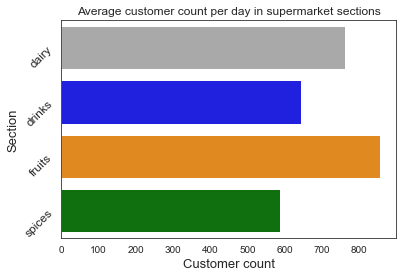

In [39]:
# Create an array with the colors you want to use
sns.set_style("white")

mycolors = ["darkgrey", "blue", "darkorange", "green"]# Set your custom color palette
sns.set_palette(sns.color_palette(mycolors))


fig1 = unique_cus_count_by_loc_plot=sns.barplot(y=[1,2,3,4], x=s, palette=mycolors, orient='h') 
plt.title('Average customer count per day in supermarket sections')
plt.xlabel("Customer count", fontsize=13)
plt.ylabel('Section', fontsize=13)

yticks_pos = ([0, 1, 2, 3])
labels = ['dairy', 'drinks', 'fruits', 'spices']

plt.yticks(yticks_pos, labels, fontweight='normal',rotation=45, fontsize = 12)


fig1.figure.savefig('plots/avg_cust_count_per_section.png', dpi=300)
